## Combolutional Neural network
Generating a Dataset of pictures with simples forms

Pictures classifaer

Dataset created: 20000 images


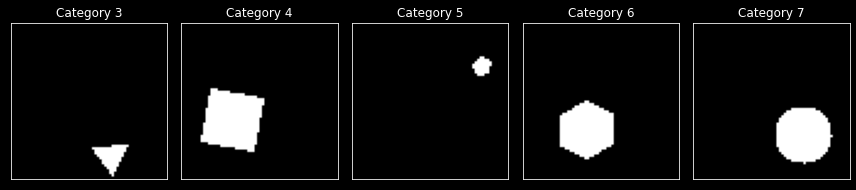

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random, math, os

RES = 64
DATASET_SIZE = 4000
TEST_RATE = 0.2

# Create Dataset Folder:
if not os.path.exists("dataset"):
    os.mkdir("dataset")

def generate_poligon(category, res = 64):
    
    # Random Radius and X,Y Position:
    radi =  random.randrange(int(res/16), int(res/4))
    posX =  random.randrange(int(radi), int(res-radi),1)
    posY =  random.randrange(int(radi), int(res-radi),1)
    pos = posX,  posY
    rot =  random.randrange(360)

    # Categoty 7 is a Circle:
    if category == 7:
        category = 360
    
    # creating geometry points:
    points = []
    for point in range(category):
        dividendo = (360/category) * point + rot
        points.append([math.cos(math.radians(dividendo))*radi+pos[0],
                      math.sin(math.radians(dividendo))*radi+pos[1]])

    img = np.zeros((res,res), np.uint8)
    pts = np.array(points, np.int32)
    
    img = cv.fillPoly(img,[pts],(255))
    return img

def makeDataset(n=1000):
    for cat in range(3,8):
        for num in range(n):
            img = generate_poligon(cat)
            plt.imsave(f'dataset/cat_{cat}_{num}.png', img, cmap = "gray")
            yield (img, cat)

# Compute:
dataset = makeDataset(DATASET_SIZE)
test_dataset = 

print("Dataset created:", DATASET_SIZE * 5, "images")

# Plot images of each category in a multiplot:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 10))
for i, ax in enumerate(axs.flat):
    img = generate_poligon(i+3)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Category {i+3}")
plt.tight_layout()
plt.show()


### CNN with Keras

In [29]:
import tensorflow as tf
import keras
from keras.layers import MaxPooling2D, Flatten, Dense, Conv2D
from unicodedata import name

# Arquitecturta:

model = keras.Sequential()
model.add(Conv2D(16, (2, 2),activation='relu' , input_shape = (256,256,1)))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (4, 4),activation='relu'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (4, 4),activation='relu'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (2, 2),activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax', name = "Final_Layer"))

# Compiler:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), # <- Lerning rate
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Save chakepoint
checkpoint_path = "cp_forms.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 255, 255, 16)      80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        16448     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        65600     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

Training the model

In [ ]:

random.shuffle(dataset)
data = dict(dataset)

arrays = []
for file_name, value in data.items():
    arrays.append(plt.imread(dataset_path + file_name)[:,:,0])

data_x = np.stack(arrays, axis=0, out=None)
data_y = np.array(list(data.values()))

In [ ]:
model.fit(
        x = train_x,
        y = train_y,
        batch_size = 10,
        epochs = 10,
        shuffle=True,
        validation_data=(test_x, test_y),
        callbacks=[cp_callback]
         )